# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Dani Abizar Ahmad - 1301213128
2. Sayid Rayhan Mulachela - 1301213355
3. Amura Maulidi Fachry  - 1301213325

#### Latar Belakang
Industri baja adalah salah satu sektor industri yang sangat energi-intensif. Masalah terkait konsumsi energi dalam industri baja memiliki dampak yang signifikan dalam hal ekonomi, lingkungan, dan keberlanjutan operasional.Setelah pentingnya industri baja, kami memutuskan untuk mengecek hubungan konsumsi energi dalan Industri Baja untuk sebuah data yang bernama "Steel Industry Data"

Data yang terdiri dari berbagai parameter, seperti 'Usage_kWh', 'CO2', 'Power_Factor', 'NSM' (Net System Margin), 'WeekStatus', 'Day_of_week', dan 'Load_Type', menawarkan peluang besar untuk menganalisis dan memahami konsumsi energi dalam industri baja dengan lebih mendalam.

**1. Pentingnya Analisis Konsumsi Energi (Usage_kWh) dalam Industri Baja:**
- Efisiensi Operasional: Analisis konsumsi energi sangat penting dalam upaya untuk meningkatkan efisiensi operasional. Dengan memahami tren konsumsi energi, perusahaan dapat mengidentifikasi pola yang mempengaruhi penggunaan energi dan merancang strategi untuk meminimalkan konsumsi energi yang tidak efisien.

- Pengelolaan Biaya: Konsumsi energi yang tinggi dapat menjadi beban biaya yang signifikan bagi perusahaan baja. Dengan menganalisis pola konsumsi energi, perusahaan dapat mengidentifikasi area-area di mana penghematan energi dapat dilakukan, membantu dalam mengurangi biaya operasional.

- Keberlanjutan dan Lingkungan: Semakin meningkatnya kepedulian terhadap lingkungan mendorong industri baja untuk mengurangi dampak lingkungan dari kegiatan operasionalnya. Mengelola dan mengurangi konsumsi energi adalah bagian penting dari inisiatif keberlanjutan ini.

**2. Manfaat Penggunaan Metode SVM pada Analisis Konsumsi Energi:**
- Penemuan Pola Kompleks: Metode SVM memungkinkan identifikasi pola yang kompleks dalam data konsumsi energi. Ini termasuk pola non-linier atau hubungan yang kompleks antara variabel yang dapat sulit diidentifikasi menggunakan metode regresi linier biasa.

- Prediksi dan Peramalan Akurat: Dengan memanfaatkan metode SVM, analisis konsumsi energi dapat memberikan prediksi yang lebih akurat untuk kebutuhan energi masa depan. Hal ini memungkinkan perencanaan yang lebih baik dan pengambilan keputusan yang lebih tepat.

- Skalabilitas dan Keterandalan: SVM adalah metode yang dapat diterapkan pada dataset yang besar dengan performa yang baik, serta memiliki kemampuan untuk mengelola noise dan toleransi terhadap kesalahan.

**3. Fokus pada Data Usage_kWh:**
- Variabel 'Usage_kWh' menjadi fokus utama dalam analisis ini. Analisis regresi menggunakan metode SVM pada data Usage_kWh bertujuan untuk memahami dan memodelkan hubungan antara faktor-faktor lain dalam dataset dengan konsumsi energi.

- Hubungan linier atau non-linier antara variabel 'Usage_kWh' dengan variabel lainnya seperti 'CO2', 'Power_Factor', 'NSM', dan 'Load_Type' akan dieksplorasi menggunakan SVM untuk mengungkap informasi berharga terkait faktor-faktor yang mempengaruhi konsumsi energi dalam industri baja.

- Dengan menganalisis dan memodelkan konsumsi energi dalam industri baja menggunakan metode SVM, diharapkan hasil dari analisis ini dapat memberikan wawasan yang kuat bagi perusahaan baja untuk mengoptimalkan penggunaan energi, mengurangi biaya, serta menjaga komitmen terhadap keberlanjutan dan lingkungan.

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [ ]:
# Memuat dataset
df = pd.read_csv("/content/sample_data/Steel_industry_data.csv")

In [ ]:
# Menampilkan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
# Menampilkan lima baris pertama dari dataset
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
# Mengonversi kolom 'date' menjadi format datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

In [ ]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
# Menampilkan lima baris pertama setelah konversi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

<Axes: >

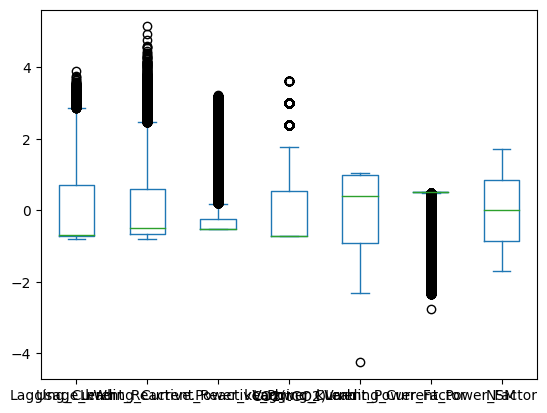

In [ ]:
# Menampilkan kembali informasi dataset setelah konversi
df.plot(kind = "box")

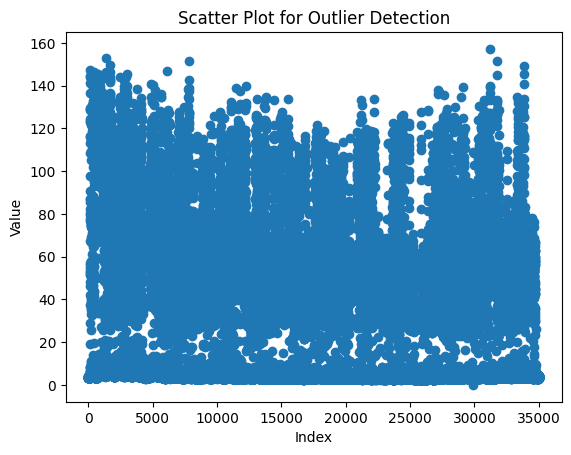

In [ ]:
plt.scatter(df.index, df['Usage_kWh'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot for Outlier Detection')
plt.show()

<ipython-input-10-5bef8f4d65b1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[selected_columns].corr()


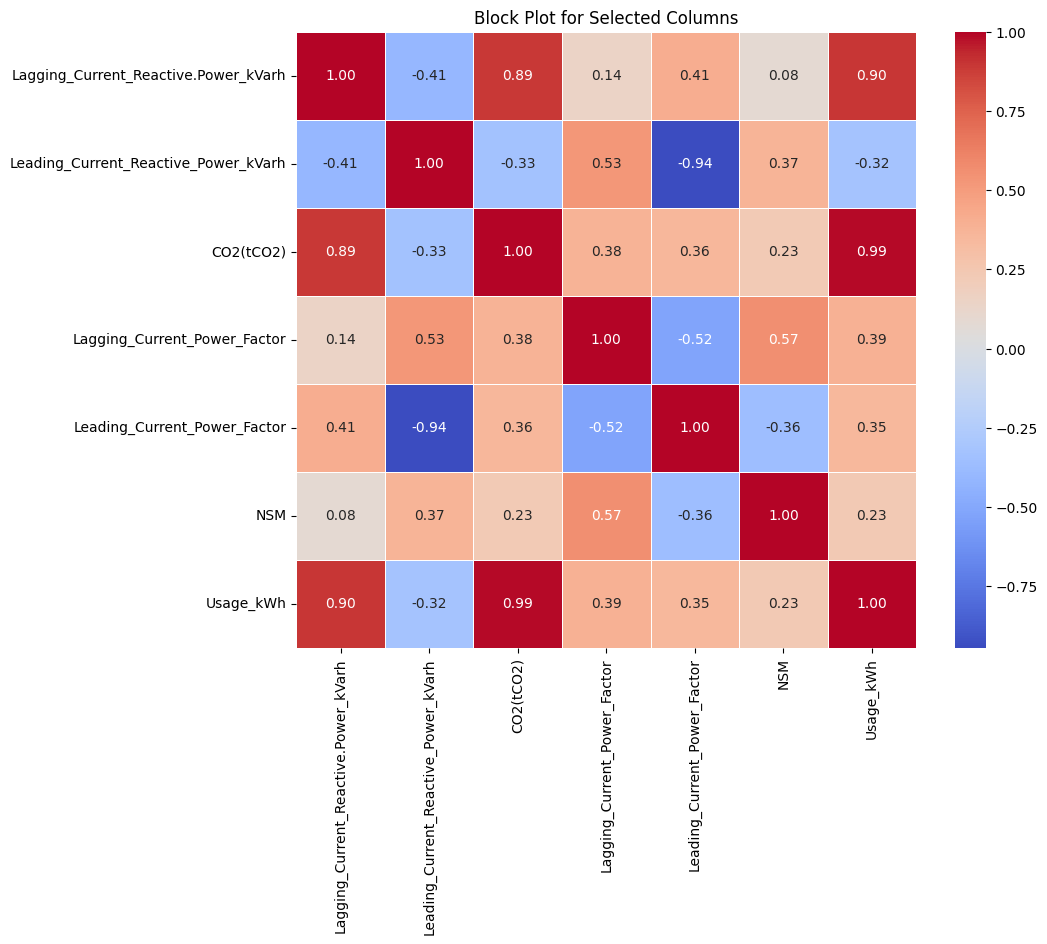

In [ ]:
selected_columns = ['date', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'Usage_kWh']

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Block Plot for Selected Columns")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

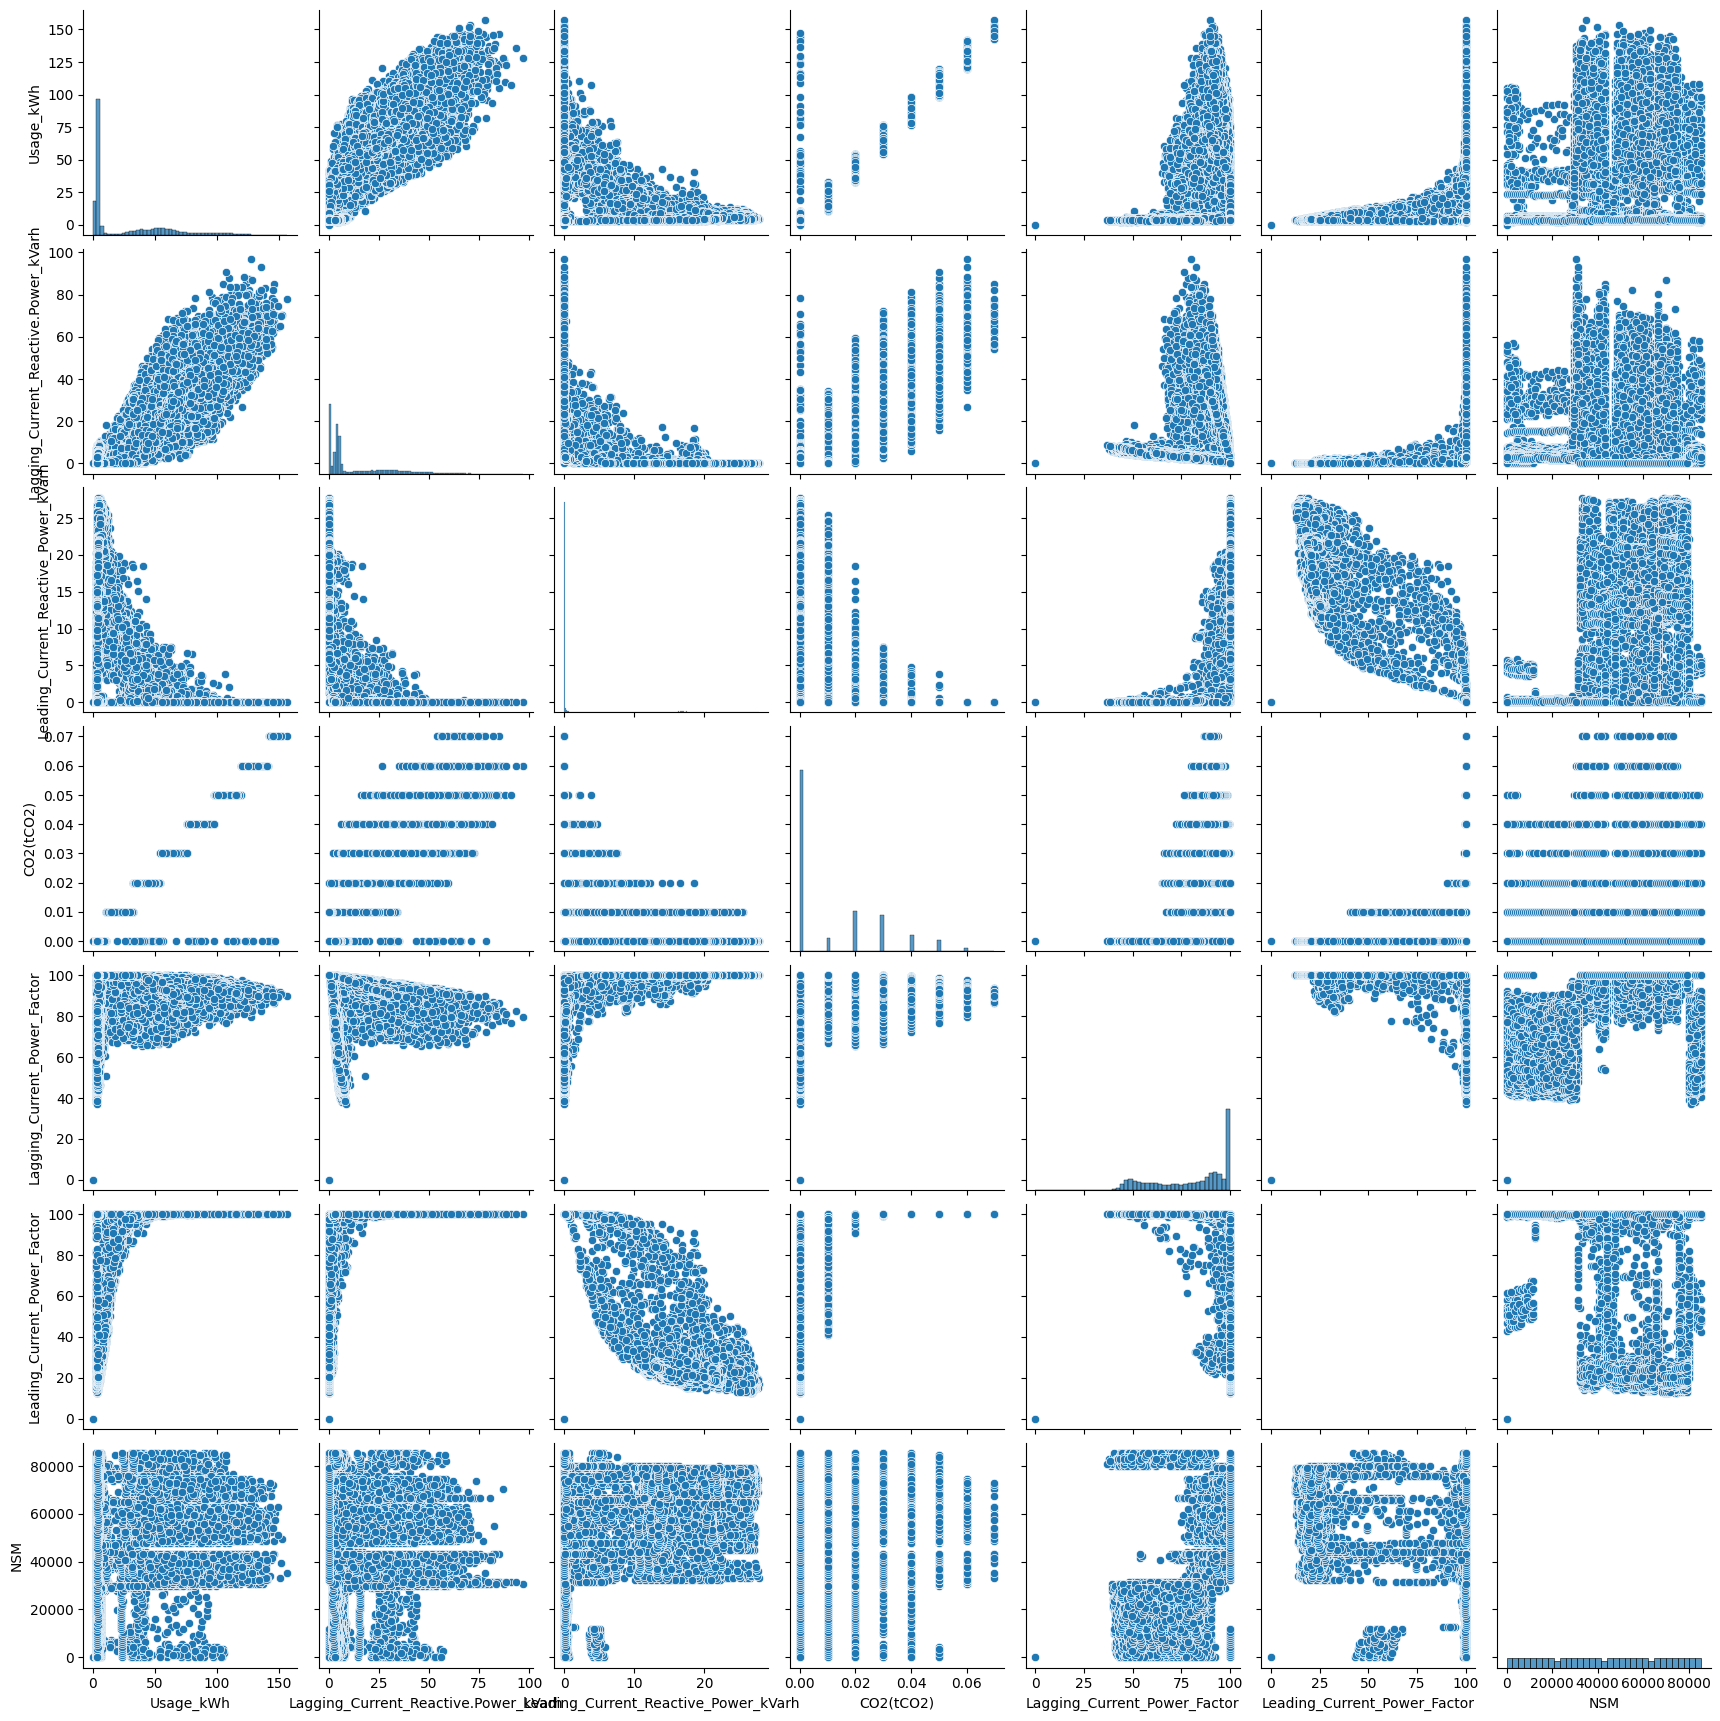

In [ ]:
# Membuat boxplot untuk setiap kolom dalam dataset
sns.pairplot(data = df)

In [ ]:
# Scaling
# Memilih fitur numerik untuk di-scaling (contoh: kecuali kolom target jika ada)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

<Axes: >

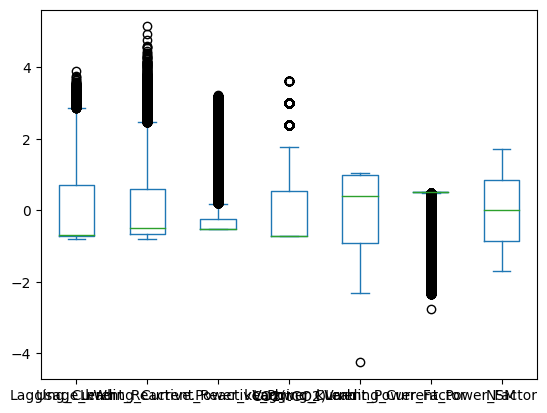

In [ ]:
# Menampilkan kembali informasi dataset setelah konversi
df.plot(kind = "box")

In [ ]:
# Menampilkan informasi dataset setelah scaling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  float64       
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

In [ ]:
# Fungsi untuk membersihkan outlier hanya pada kolom numerik
def remove_outliers_by_columns(df, columns):
    temp_df = df.copy()
    indices_to_keep = ~((df[columns] < (df[columns].quantile(0.25) - 1.5 * (df[columns].quantile(0.75) - df[columns].quantile(0.25)))) |
                      (df[columns] > (df[columns].quantile(0.75) + 1.5 * (df[columns].quantile(0.75) - df[columns].quantile(0.25))))).any(axis=1)
    return df[indices_to_keep]

# Membersihkan outlier pada kolom-kolom numerik
cleaned_df = remove_outliers_by_columns(df, numerical_features)

# Menampilkan informasi dataset setelah penghapusan outlier
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24500 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  24500 non-null  datetime64[ns]
 1   Usage_kWh                             24500 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  24500 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  24500 non-null  float64       
 4   CO2(tCO2)                             24500 non-null  float64       
 5   Lagging_Current_Power_Factor          24500 non-null  float64       
 6   Leading_Current_Power_Factor          24500 non-null  float64       
 7   NSM                                   24500 non-null  float64       
 8   WeekStatus                            24500 non-null  object        
 9   Day_of_week                           24500 non-null  object        
 10

In [ ]:
# Menerapkan one-hot encoding untuk fitur kategori
pd.get_dummies(df).corr()["Usage_kWh"]

<ipython-input-16-e762762c7571>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.get_dummies(df).corr()["Usage_kWh"]


Usage_kWh                               1.000000
Lagging_Current_Reactive.Power_kVarh    0.896150
Leading_Current_Reactive_Power_kVarh   -0.324922
CO2(tCO2)                               0.988180
Lagging_Current_Power_Factor            0.385960
Leading_Current_Power_Factor            0.353566
NSM                                     0.234610
WeekStatus_Weekday                      0.295475
WeekStatus_Weekend                     -0.295475
Day_of_week_Friday                      0.070786
Day_of_week_Monday                      0.070948
Day_of_week_Saturday                   -0.139764
Day_of_week_Sunday                     -0.241814
Day_of_week_Thursday                    0.094150
Day_of_week_Tuesday                     0.085808
Day_of_week_Wednesday                   0.059320
Load_Type_Light_Load                   -0.578921
Load_Type_Maximum_Load                  0.487792
Load_Type_Medium_Load                   0.204521
Name: Usage_kWh, dtype: float64

In [ ]:
# One-hot encoding for categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical features to one-hot encoded columns
one_hot_encoded_df = pd.get_dummies(cleaned_df, columns=categorical_features, drop_first=True)

# Splitting data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(one_hot_encoded_df))
train_df = one_hot_encoded_df[:train_size]
test_df = one_hot_encoded_df[train_size:]

# Separating features and labels
X_train = train_df.drop(['Load_Type_Medium_Load', 'Load_Type_Maximum_Load', 'date', "Usage_kWh"], axis=1)
y_train = train_df["Usage_kWh"]  # Multi-label classification
X_test = test_df.drop(['Load_Type_Medium_Load', 'Load_Type_Maximum_Load', 'date', "Usage_kWh"], axis=1)
y_test = test_df["Usage_kWh"]

one_hot_encoded_df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,2018-01-01 00:15:00,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0,1,0,0,0,0,0,0,0


In [ ]:
X_train

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0,1,0,0,0,0,0
1,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0,1,0,0,0,0,0
2,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0,1,0,0,0,0,0
3,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0,1,0,0,0,0,0
4,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,-0.475009,-0.521385,-0.71355,-1.567463,0.513268,-1.317152,1,0,0,1,0,0,0
28139,-0.397736,-0.521385,-0.71355,-1.580676,0.513268,-1.281065,1,0,0,1,0,0,0
28140,-0.406321,-0.521385,-0.71355,-1.516726,0.513268,-1.244979,1,0,0,1,0,0,0
28141,-0.490341,-0.521385,-0.71355,-1.609216,0.513268,-1.208893,1,0,0,1,0,0,0


In [ ]:
y_train

0       -0.724105
1       -0.699287
2       -0.722012
3       -0.719919
4       -0.704669
           ...   
28138   -0.725301
28139   -0.703772
28140   -0.702576
28141   -0.731580
28142   -0.736962
Name: Usage_kWh, Length: 19600, dtype: float64

#### Ringkasan Metode
1. Inisialisasi SVRLinear:

- Parameter:
 - C: Parameter regularisasi untuk mengendalikan margin dan penalti kesalahan.
 - epsilon: Toleransi terhadap pelanggaran margin.
 - lr: Learning rate untuk pembaruan bobot dan bias.
 - max_iter: Jumlah iterasi maksimum untuk optimisasi.

2. Metode fit:
- Melakukan iterasi sebanyak max_iter untuk mengoptimalkan bobot dan bias.
- Inisialisasi bobot dan bias.
- Loop pada setiap sampel dalam X (fitur):
 - Menghitung kesalahan prediksi dengan metode predict.
 - Jika kesalahan melebihi epsilon-insensitive tube, maka dilakukan pembaruan bobot dan bias berdasarkan learning rate dan perbedaan prediksi dan target aktual.
 - Pembaruan dilakukan menggunakan formula untuk memperbarui bobot dan bias.

3. Metode predict:
- Menggunakan bobot dan bias yang telah dihitung untuk memprediksi nilai berdasarkan X.

4. Implementasi Kode:
- Membuat instance dari kelas SVRLinear (pada contoh ini: svm_regressor).
- Melakukan pelatihan model dengan memanggil fit menggunakan data latih (X_train dan y_train).
- Melakukan prediksi pada data uji (X_test) dan menyimpan prediksi sebagai y_pred.
- Menggunakan metrik evaluasi (MSE dan R2) dari sklearn.metrics untuk mengevaluasi kinerja model.

In [ ]:
class SVRLinear:
    def __init__(self, C=1.0, epsilon=0.01, lr=0.01, max_iter=1000):
        self.C = C  # Regularization parameter
        self.epsilon = epsilon  # Tolerance for margin violation
        self.lr = lr  # Learning rate
        self.max_iter = max_iter  # Maximum iterations for optimization
        self.weights = None  # Weights for SVR
        self.bias = None  # Bias term for SVR

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights
        self.bias = 0.0  # Initialize bias term

        for _ in range(self.max_iter):
            for i in range(n_samples):
                error = self.predict(X[i]) - y[i]
                # If the error violates the epsilon-insensitive tube
                if np.abs(error) > self.epsilon:
                    # Update the weights and bias using the learning rate
                    self.weights -= self.lr * (2 * self.C * self.weights) - self.lr * X[i] * y[i]
                    self.bias -= self.lr * y[i]

        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Baseline Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Inisialisasi model SVM Regresi

svm_regressor = SVRLinear()

# Training model
svm_regressor.fit(X_train.values, y_train.values)

# Prediksi data pengujian
y_pred = svm_regressor.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

MSE: 229361.23078774218, R2: -311821.512552247


#### Hasil dan Analisis

Hyperparameter tuning

Kita coba melakukan observasi model baseline dengan berbagai skema parameter untuk memilih model terbaik

In [ ]:
hyperparameters = {
  'C': [1.0, 5.0, 10.0],
  'learning_rate': [0.00001, 0.00003, 0.000001, 0.000003]
}

result = {
    "C": [],
    "learning_rate": [],
    "mse": [],
    "r2_square": [],
}

for i in range(3):
  for j in range(4):
    result["C"].append(hyperparameters["C"][i])
    result["learning_rate"].append(hyperparameters["learning_rate"][j])
    svm_regressor = SVRLinear(C = hyperparameters["C"][i],
                        lr = hyperparameters["learning_rate"][j],
                        max_iter = 100)
    svm_regressor.fit(X_train.values, y_train.values)
    pred = svm_regressor.predict(X_test)
    result["mse"].append(mean_squared_error(y_test, pred))
    result["r2_square"].append(r2_score(y_test, pred))

In [ ]:
hyperparameter_tuning_result = pd.DataFrame(result)

In [ ]:
hyperparameter_tuning_result.sort_values(by = "mse", ascending = True)

,C,learning_rate,mse,r2_square
3,1.0,0.000003,0.086122,0.882915
0,1.0,0.000010,0.086698,0.882132
2,1.0,0.000001,0.088041,0.880306
1,1.0,0.000030,0.105390,0.856719
6,5.0,0.000001,0.474775,0.354531
7,5.0,0.000003,0.474974,0.354261
4,5.0,0.000010,0.476748,0.351849
5,5.0,0.000030,0.502363,0.317025
10,10.0,0.000001,0.597238,0.188039
11,10.0,0.000003,0.597497,0.187687


In [ ]:
hyperparameter_tuning_result.to_csv("hasil_kerjaan_dani_tubes_ml.csv", index = False)

####Hasil dan Analisis
Untuk menunjukkan hasil dari training model yang telah dilakukan, kami melakukan training model menggunakan beberapa skema parameter untuk menentukan model terbaik. Kami menggunakan parameter C yaitu 1, 5, dan 10 dan menggunakan parameter learning rate 0.00001, 0.00003, 0.000001, 0.000003.

Dari hasil tersebut yang ditunjukkan pada tabel hyperparamter_tuning_result, terlihat bahwa nilai C yang semakin kecil akan menghasilkan nilai MSE yang lebih kecil, namun tidak ditunjukkan korelasi antara nilai learning rate dan MSE yang ditunjukkan dengan urutan nilai learning rate yang tidak terurut untuk tiap skema C.

#### Kesimpulan

Analisis industri baja yang berfokus pada konsumsi energi memberikan gambaran menyeluruh dan menunjukkan betapa pentingnya analisis dalam mendukung efisiensi, pengelolaan biaya, dan komitmen terhadap keberlanjutan. Metode Support Vector Machine (SVM) digunakan dalam analisis konsumsi energi ini untuk memungkinkan identifikasi pola yang kompleks dan prediksi yang akurat.

Ringkasan metode ini memberikan pemahaman tentang langkah-langkah yang diambil dalam inisialisasi model, proses fitting, dan prediksi berdasarkan parameter yang disetel dalam algoritma.

Hasil analisis dengan berbagai skema parameter menunjukkan bahwa penggunaan nilai C yang lebih kecil menghasilkan kinerja model yang lebih baik, yang tercermin dalam nilai Mean Squared Error (MSE) yang lebih rendah. Namun, tidak ada pola yang jelas antara nilai learning rate dan MSE, menunjukkan bahwa nilai learning rate tidak memiliki korelasi langsung dengan kinerja model dalam skema parameter yang digunakan.

Secara keseluruhan, analisis ini memberikan pandangan yang kuat tentang pentingnya analisis konsumsi energi dalam industri baja dan kemampuan SVM dalam memahami serta memprediksi pola konsumsi energi,